###### Credit : Jose Portilla, Pierian Data www.pieriantraining.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


##### Add text length column

In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## EDA

##### Star Ratings Distribution

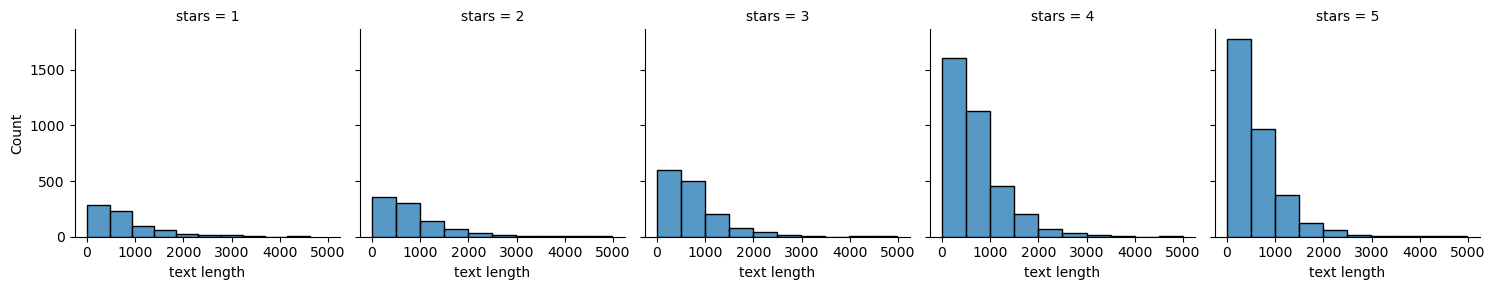

In [9]:
g = sns.FacetGrid(yelp, col = 'stars')
g.map(sns.histplot, 'text length', bins = 10)

plt.show()

##### Text Length Distribution by Star Rating

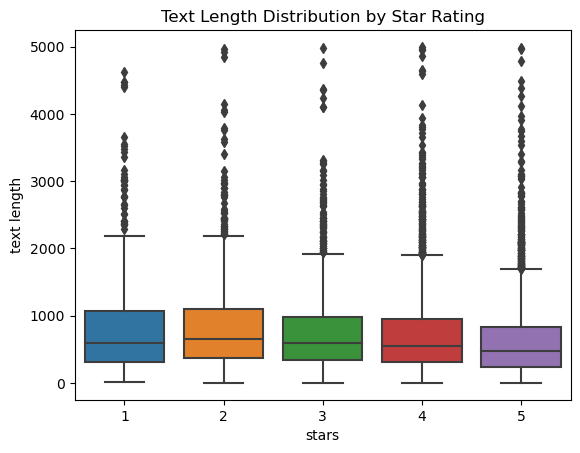

In [11]:
sns.boxplot(yelp, x = 'stars', y = 'text length')

plt.title('Text Length Distribution by Star Rating')
plt.show()

##### Star Rating Occurrencies

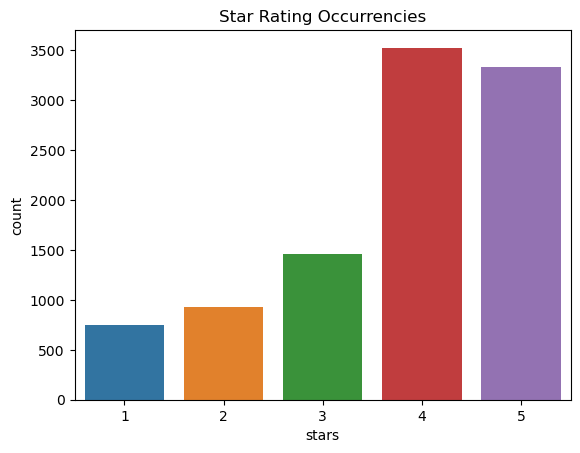

In [12]:
sns.countplot(yelp, x = 'stars')

plt.title('Star Rating Occurrencies')
plt.show()

##### Mean values of numerical columns

In [13]:
yelp.groupby('stars').mean('text length')

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


##### Correlation Map

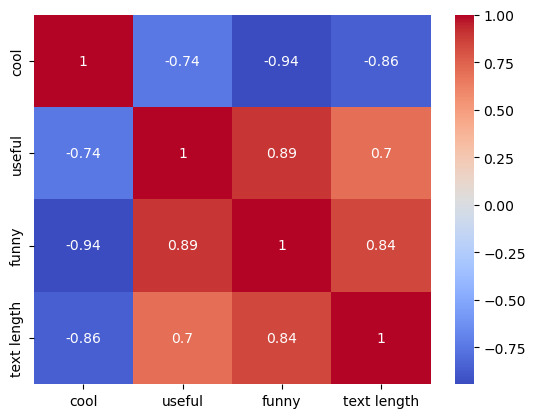

In [46]:
sns.heatmap(data = yelp.groupby('stars').mean('text length').corr(), cmap = 'coolwarm', annot = True)

plt.show()

## 1/ Simple NLP Model with Naive Bayes

Classify reviews into 1 or 5 star ratings

In [15]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [16]:
X = yelp_class['text']
y = yelp_class['stars']

##### Vectorisation

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer()
X = cv.fit_transform(X)

##### Set Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

##### Model with Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [21]:
nb.fit(X_train, y_train)

MultinomialNB()

##### Prediction

In [22]:
predictions = nb.predict(X_test)

##### Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## 2/ NLP Model with TF-IDF and Pipeline

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import nltk
import string
from nltk.corpus import stopwords

In [26]:
def text_process(text) :
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

##### Pipeline

In [27]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

##### Set Split

In [28]:
from sklearn.model_selection import train_test_split
txt_train, txt_test, label_train, label_test = train_test_split(yelp_class['text'], yelp_class['stars'], test_size = 0.3, random_state = 101)

##### Model

In [29]:
pipeline.fit(txt_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002AC39A95C60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

##### Prediction

In [30]:
y_pred = pipeline.predict(txt_test)

##### Evaluation

In [31]:
print(confusion_matrix(label_test, y_pred))
print('\n')
print(classification_report(label_test, y_pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



In [32]:
# TF-IDF actually made the model worse

##### Remove TF-IDF

In [33]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('classifier', MultinomialNB())
])

##### Set Split

In [36]:
from sklearn.model_selection import train_test_split
txt_train, txt_test, label_train, label_test = train_test_split(yelp_class['text'], yelp_class['stars'], test_size = 0.3, random_state = 101)

##### Model

In [37]:
pipeline.fit(txt_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002AC39A95C60>)),
                ('classifier', MultinomialNB())])

##### Prediction

In [38]:
y_pred = pipeline.predict(txt_test)

##### Evaluation

In [39]:
print(confusion_matrix(label_test, y_pred))
print('\n')
print(classification_report(label_test, y_pred))

[[143  85]
 [ 11 987]]


              precision    recall  f1-score   support

           1       0.93      0.63      0.75       228
           5       0.92      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.92      0.81      0.85      1226
weighted avg       0.92      0.92      0.92      1226



## 3/ NLP Model with Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

##### Pipeline

In [41]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', RandomForestClassifier())
])

##### Set Split

In [42]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

##### Model

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('classifier', RandomForestClassifier())])

##### Prediction

In [44]:
predictions = pipeline.predict(X_test)

##### Evaluation

In [45]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 53 175]
 [  2 996]]


              precision    recall  f1-score   support

           1       0.96      0.23      0.37       228
           5       0.85      1.00      0.92       998

    accuracy                           0.86      1226
   macro avg       0.91      0.62      0.65      1226
weighted avg       0.87      0.86      0.82      1226

